In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from scipy.fftpack import fft, ifft, fftfreq


In [1]:
def sqr_signal (x):
    a = 2.0
    T = 2
    if x < 0:
        x = abs(x) + float(T)/2
    place = x - float(T * (int(x)//T))
    if (place >= 1.0):
        return (-a)
    else:
        return (a)

In [19]:
def triangle_signal(x):
    a = 1.0
    T = 2
    if x < 0:
        x = abs(x) + float(T)/2
    place = x - float(T * (int(x)//T))
    if (place <= 0.5):
        return (2*place)
    elif (place >= 1.5):
        return (2*place - 4)
    else:
        return (2*a-2*place)

In [5]:
def sqr_cos(x,n,w):
    return sqr_signal(x) * np.cos(n * w * x)

def sqr_sin(x,n,w):
    return sqr_signal(x) * np.sin(n * w * x)

def an (n,w):
    return 2/T * integrate.quad(sqr_cos,t0,t0+T,args=(n,w,))[0]

def bn (n,w):
    return 2/T * integrate.quad(sqr_sin,t0,t0+T,args=(n,w,))[0]

def furye (x,n,T):
    sum = 0
    w = 2*np.pi/T
    a0 = 2/T * integrate.quad(sqr_signal,t0,t0+T)[0]
    for i in range(1,n):
        sum += an(i,w)*np.cos(i * w * x) + bn(i,w)*np.sin(i * w * x)
    return a0/T + sum

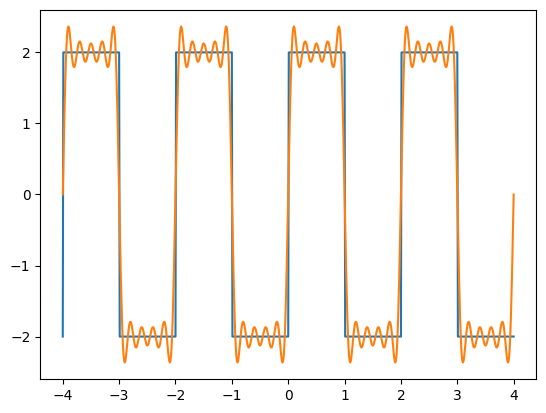

In [106]:
T = 2.0
x = np.arange(-4, 4.01, 0.01)
f = np.vectorize(sqr_signal)
y = f(x)
t0 = 0
N = 10
ff = np.vectorize(lambda x,N,T : furye(x,N,T))
yf = ff(x,N,T)

plt.plot(x,y)
plt.plot(x,yf)
plt.show()

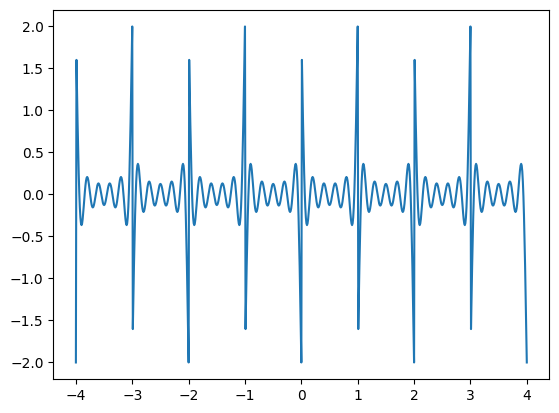

In [107]:
plt.plot(x,y-yf)
plt.show()

In [25]:
def sqr_cos(x,n,w):
    return triangle_signal(x) * np.cos(n * w * x)

def sqr_sin(x,n,w):
    return triangle_signal(x) * np.sin(n * w * x)

def an (n,w,T):
    return 2/T * integrate.quad(sqr_cos,t0,t0+T,args=(n,w,))[0]

def bn (n,w,T):
    return 2/T * integrate.quad(sqr_sin,t0,t0+T,args=(n,w,))[0]

def furye (x,n,T):
    sum = 0
    w = 2*np.pi/T
    a0 = 2/T * integrate.quad(triangle_signal,t0,t0+T)[0]
    for i in range(1,n):
        sum += an(i,w,T)*np.cos(i * w * x) + bn(i,w,T)*np.sin(i * w * x)
    return a0/T + sum

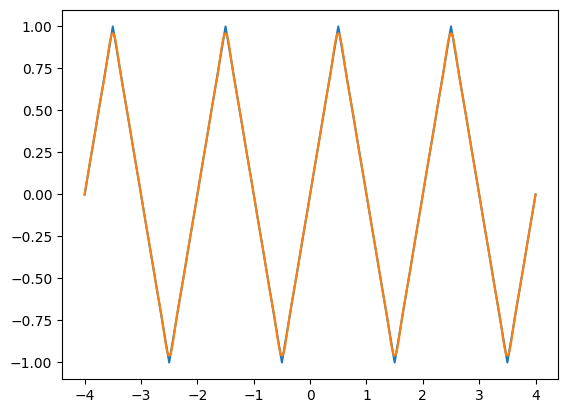

In [37]:
T = 2.0
x = np.arange(-4, 4.01, 0.01)
f = np.vectorize(triangle_signal)
y = f(x)
t0 = 0
N = 10
ff = np.vectorize(lambda x,N,T : furye(x,N,T))
yf = ff(x,N,T)

plt.plot(x,y)
plt.plot(x,yf)
plt.show()

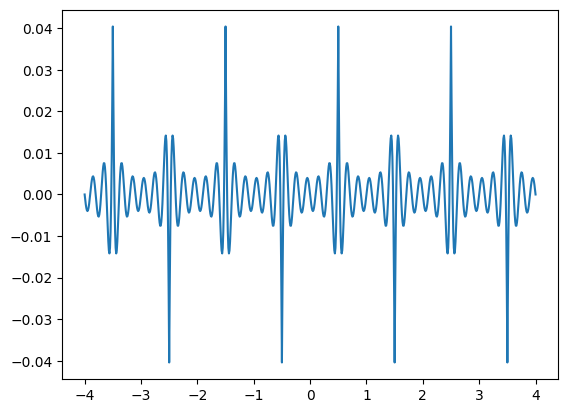

In [38]:
plt.plot(x,y-yf)
plt.show()

In [108]:
def signal(x):
    w = 2 * np.pi * 100
    #print(w)
    A = 0.1
    return  A * np.cos(w * x)

In [109]:
def sqr_cos(x,n,w):
    return signal(x) * np.cos(n * w * x)

def sqr_sin(x,n,w):
    return signal(x) * np.sin(n * w * x)

def an (n,w):
    return 2/T * integrate.quad(sqr_cos,t0,t0+T,args=(n,w,))[0]

def bn (n,w):
    return 2/T * integrate.quad(sqr_sin,t0,t0+T,args=(n,w,))[0]

def furye_cos (x,n,T):
    sum = 0
    w = 2*np.pi/T
    a0 = 2/T * integrate.quad(signal,t0,t0+T)[0]
    for i in range(1,n):
        sum += an(i,w)*np.cos(i * w * x) + bn(i,w)*np.sin(i * w * x)
    return a0/T + sum

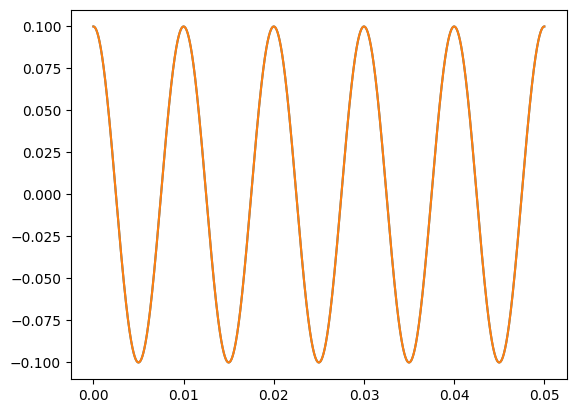

In [110]:
T = 0.01
x = np.arange(0, 0.050001, 0.000001)
f = np.vectorize(signal)
y = f(x)
t0 = 0
N = 10
ff = np.vectorize(lambda x,N,T : furye_cos(x,N,T))
yf = ff(x,N,T)
plt.plot(x,y)
plt.plot(x,yf)
plt.show()

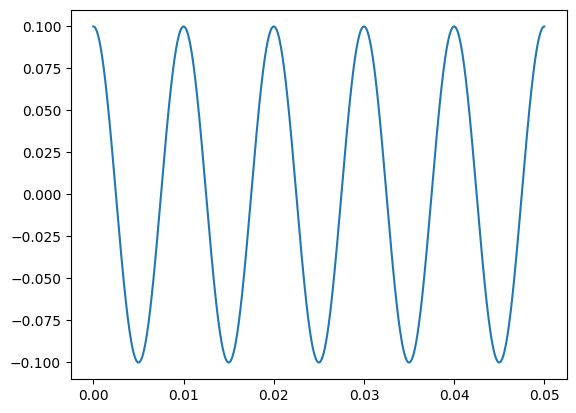

In [111]:
plt.plot(x,y)
plt.show()

In [112]:
from scipy.fft import fft, ifft, fftfreq

Text(0, 0.5, 'Амплитуда')

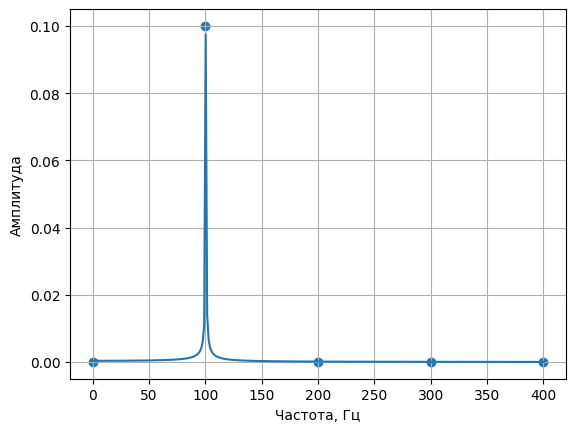

In [113]:
N = 600 # Количество отсчетов
fmax=800 # максимальная частота
T = 1.0/fmax #
f=100 # частота сигнала в Гц
x = np.linspace(0.0, N*T, N)
y = 0.1 * np.cos(f * 2.0*np.pi*x) 
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)

x = []
y = []
def scos(x,n,w):
    return 0.1 * np.cos(f * 2.0*np.pi*x) * np.cos(n * w * x)
    
for i in range (5):
    x.append(i*100)
    y.append(2*100 * integrate.quad(scos,t0,t0+1/100,args=(i,2*np.pi*100,))[0])

plt.scatter(x,y)
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

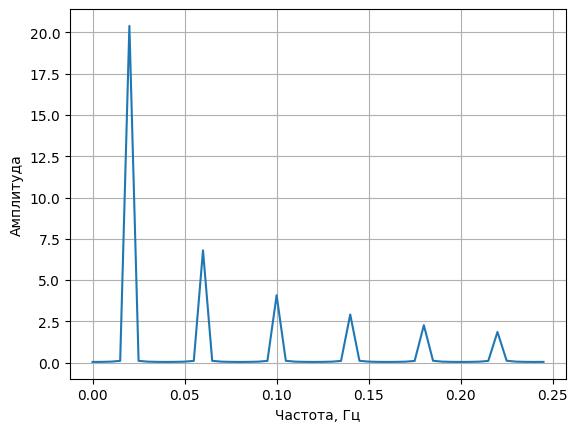

In [35]:
Tq = 2.0
xq = np.arange(-4, 4.01, 0.01)
fq = np.vectorize(sqr_signal)
yq = fq(xq)
t0 = 0
N = 100
xf = np.linspace(0.0, 300/2, N//2)
yff = fft(yq)

yf = fft(yq)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

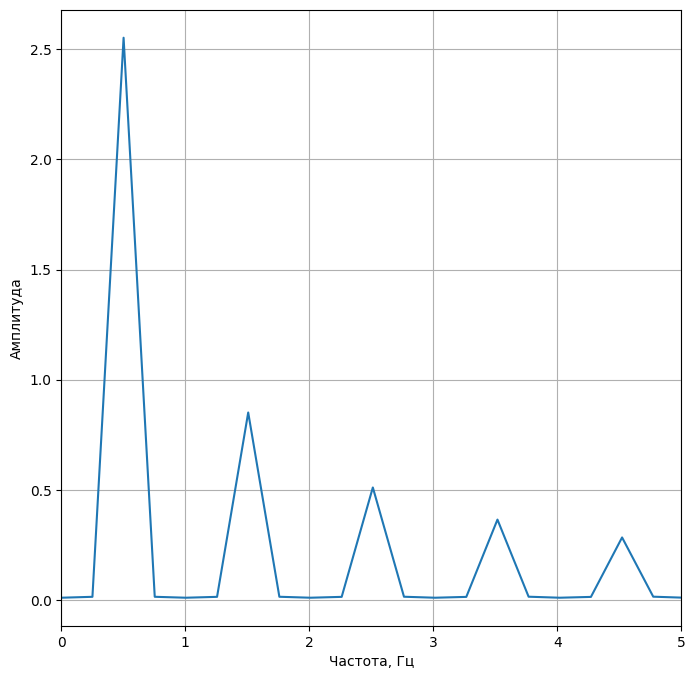

In [43]:
N = 400 # Количество отсчетов
fmax=100 # максимальная частота


x = np.arange(0, 4.01, 0.01)
f = np.vectorize(sqr_signal)
y = f(x)

xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)




fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.xlim(0,5)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

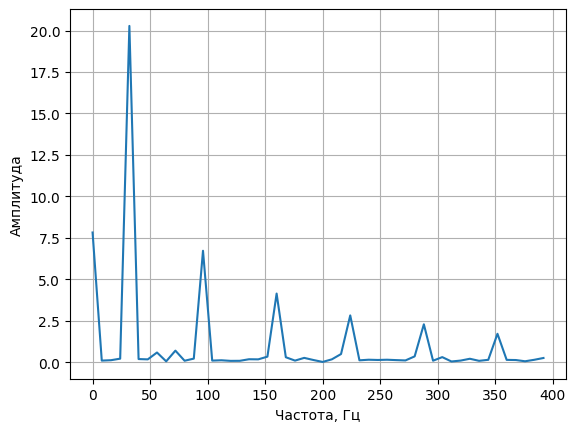

In [127]:
import random as rm
def noise(x):
    return 0.1 * np.cos(15* 2.0*np.pi*x) + 0.1 * np.sin(1 * 2.0*np.pi*x)  + rm.random() 
    #return 0

def sqr_noised_signal (x):
    a = 2.0
    T = 2
    if x < 0:
        x = abs(x) + float(T)/2
    place = x - float(T * (int(x)//T))
    if (place >= 1.0):
        return (-a) + noise(x)
    else:
        return (a) + noise(x)


Tq = 2.0
xq = np.arange(-4, 4.01, 0.01)
fq = np.vectorize(sqr_noised_signal)
yq = fq(xq)
t0 = 0
N = 100
xf = np.linspace(0.0, 300/2, N//2)
yff = fft(yq)

yf = fft(yq)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

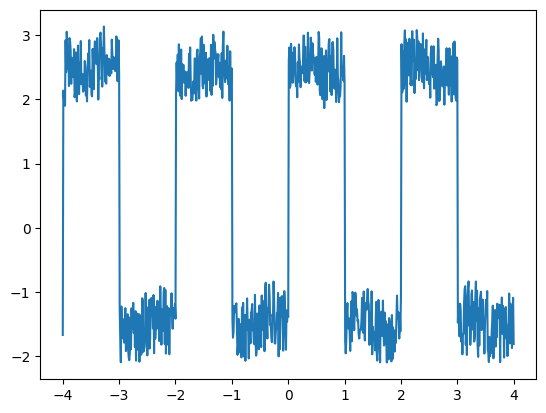

In [128]:
plt.plot(xq,yq)